In [ ]:
from google.colab import files
uploaded = files.upload() 

In [ ]:
%reload_ext rpy2.ipython

In [ ]:
%%R
library(readr) #read in the data
library(ggplot2) #visualization 

library(corrplot) #visualization of correlation
library(ggcorrplot) #visualization of correlation
library(reshape2) #melt function
library(dplyr) #used for data transformations
library(tidyverse) #used for data transformations
insurance <- read_csv(file = "insurance.csv") #input the dataset  

R[write to console]: corrplot 0.84 loaded

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ tibble  3.0.4     ✔ stringr 1.4.0
✔ tidyr   1.1.2     ✔ forcats 0.5.0
✔ purrr   0.3.4     

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  age = col_double(),
  sex = col_character(),
  bmi = col_double(),
  children = col_double(),
  smoker = col_character(),
  region = col_character(),
  charges = col_double()
)




In [ ]:
%%R 
install.packages("ggplot2")
install.packages("corrplot")
install.packages("ggcorrplot")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.3.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3054431 bytes (2.9 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

In [ ]:
%%R
summary(insurance)

      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region             charges     
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  


R[write to console]: Using sex, smoker as id variables



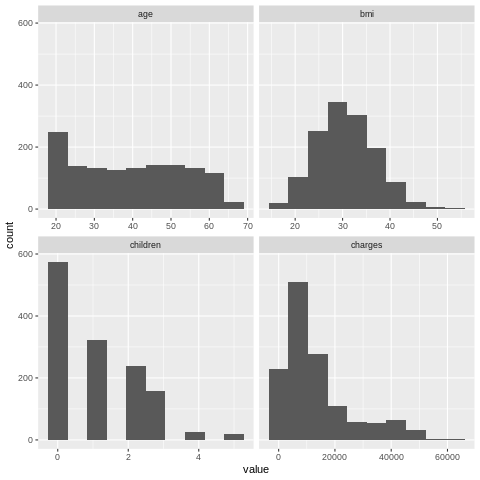

In [ ]:
%%R
ggplot(data = melt(insurance[, -6]), mapping = aes(x = value)) + 
  geom_histogram(bins = 10) + facet_wrap(~variable, scales = "free_x")


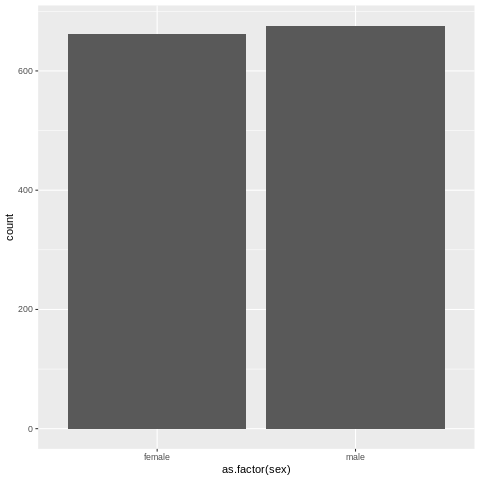

In [ ]:
%%R

ggplot(data = insurance) +
geom_bar(mapping = aes(x = as.factor(sex)))


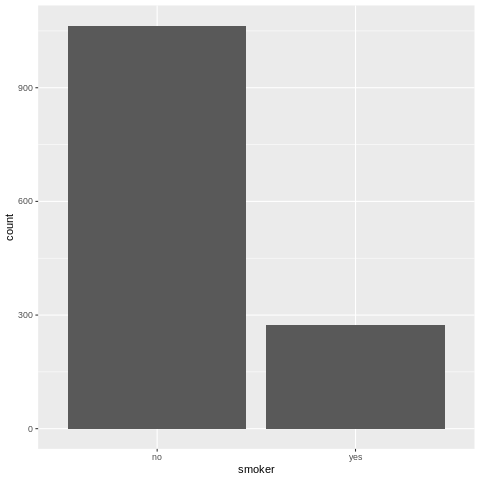

In [ ]:
%%R

ggplot(data = insurance) + 
geom_bar(mapping = aes(x = smoker))


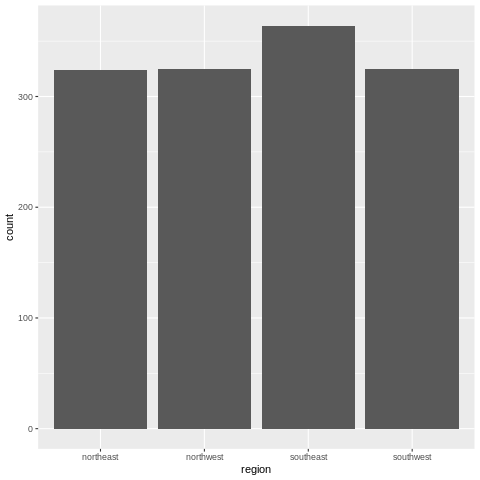

In [ ]:
%%R
ggplot(data = insurance) + 
geom_bar(mapping = aes(x= region))

In [ ]:
%%R
insurance <- insurance %>%
mutate(obese = ifelse(bmi >= 30, "yes", "no"))
head(insurance)
averageCharges <- insurance %>%
  group_by(smoker, obese) %>%
  summarise(
    count = n(),
    average_charge = mean(charges, na.rm = TRUE), 
    stdev_charge = sd(charges, na.rm = TRUE)
  )
print(averageCharges)

R[write to console]: `summarise()` regrouping output by 'smoker' (override with `.groups` argument)



# A tibble: 4 x 5
# Groups:   smoker [2]
  smoker obese count average_charge stdev_charge
  <chr>  <chr> <int>          <dbl>        <dbl>
1 no     no      502          7977.        5839.
2 no     yes     562          8843.        6105.
3 yes    no      129         21363.        5067.
4 yes    yes     145         41558.        6031.


In [ ]:
%%R
insurance$obese <- as.factor(insurance$obese)
insurance$smoker <- as.factor(insurance$smoker)
insurance$sex <- as.factor(insurance$sex)
insurance$region <- as.factor(insurance$region)

set.seed(134) #set seed to make reproducible 
sampleSize <- floor(.75*nrow(insurance))
trainIndexes <- sample(seq_len(nrow(insurance)), sampleSize, replace = FALSE) 
train <- insurance[trainIndexes, ]
test <- insurance[-trainIndexes, ]

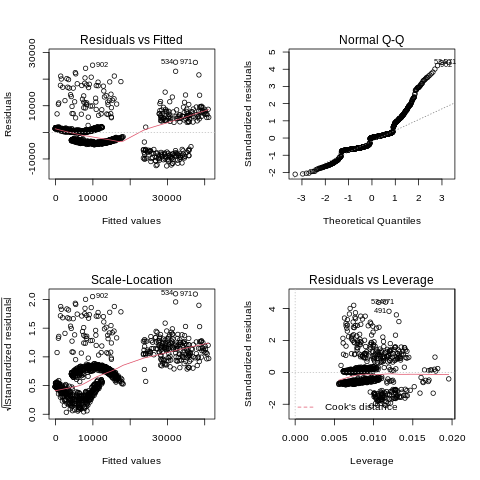

In [ ]:
%%R
par(mfrow = c(2,2))
lm.fit.m.1 <- lm(charges ~ . - bmi, data = train)
summary(lm.fit.m.1)
plot(lm.fit.m.1)

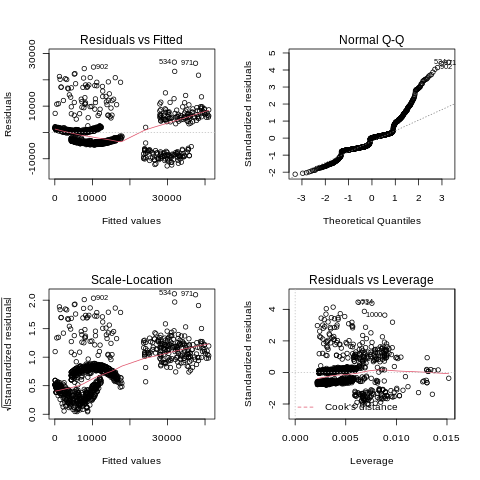

In [ ]:
%%R
par(mfrow = c(2,2))
lm.fit.m.2 <- lm(charges ~ . - bmi - sex - region, data = train)
summary(lm.fit.m.2)
plot(lm.fit.m.2)

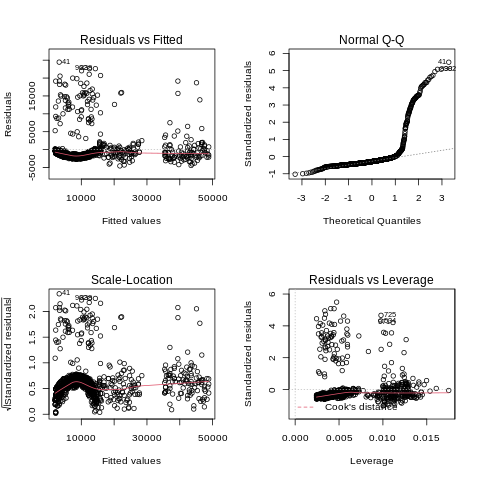

In [ ]:
%%R
par(mfrow = c(2,2))
lm.fit.m.3 <- lm(charges ~ obese*smoker + age + children, data = train)
summary(lm.fit.m.3) #Due to the hierarchy principal, even though obeseyes is insignificant, we must leave the coefficient in because the interaction term is significant 
plot(lm.fit.m.3)

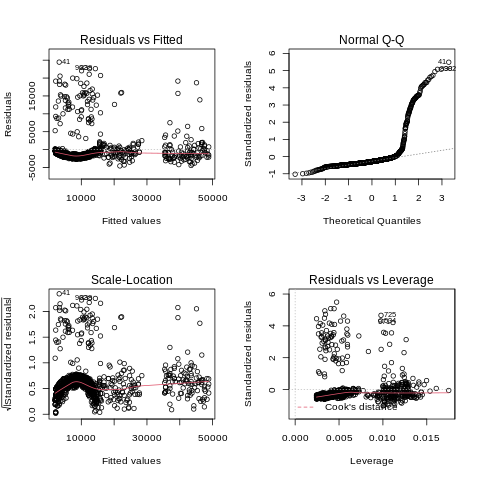

In [ ]:
%%R
par(mfrow = c(2,2))
lm.fit.m.3 <- lm(charges ~ obese*smoker + age + children, data = train)
summary(lm.fit.m.3) #Due to the hierarchy principal, even though obeseyes is insignificant, we must leave the coefficient in because the interaction term is significant 
plot(lm.fit.m.3)